<a href="https://colab.research.google.com/github/jhj030722/til/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_week3_4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전체 과정의 개요

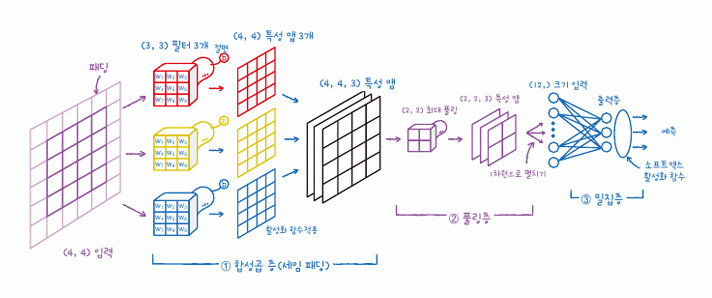

# 합성곱

- 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 비유 가능

인공신경망은 처음에 가중치 w와 절편 b를 랜덤하게 초기화한 다음 epoch를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아감 --> 이것이 **모델 훈련**

밀집층에 뉴런이 3개면 -> 출력도 3개 (입력개수에 관계없이)


<합성곱의 동작 원리>
**but 합성곱은 밀집층계산처럼 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱합**

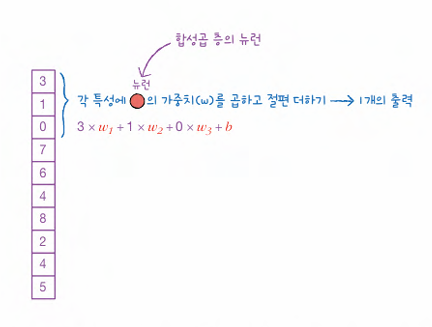

가중치 w1~w3이 처음 3개의 특성과 곱해져 1개의 출력을 만듬

이 뉴런이 한 칸 아래로 이동해 2번째~4번째 특성과 곱해져 새로운 출력을 만듬

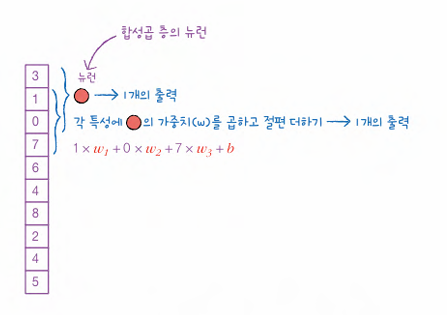

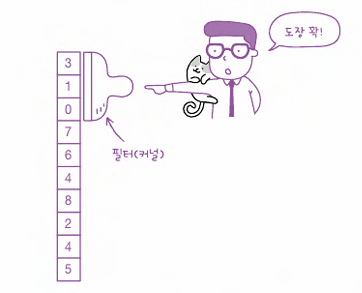

**첫번째 합성곱에 사용된 가중치 w1~w3과 절편b가 두번째 합성곱에도 동일하게 사용됨**

- 이렇게 한 칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱
- 여기에서는 뉴런 가중치가 3개이므로 모두 8개의 출력이 만들어짐
- 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름 (또 다른 하이퍼 파라미터)

**합성곱 신경망(CNN)**

- 뉴런이 입력 위를 이동하면서 출력을 만들기 때문에 일반적인 신경망의 뉴런과 좀 다름.
- CNN에서는 완전 연결 신경망과 달리 뉴런을 **필터** 혹은 **커널** 이라고 부름
- 장점: 1차원이 아니라 2차원 입력에도 적용할 수 있음
  - 입력이 2차원 배열이면 필터(도장=뉴런)도 2차원이어야 함
- 계산은 이전의 밀집층 신경망과 똑같이 입력과 가중치의 행과 열을 맞춰 곱셈하고 모두 더하는 것.

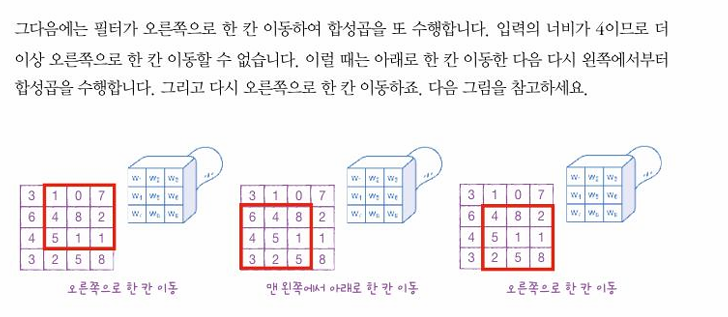

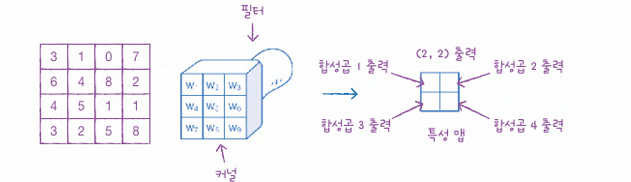

위의 사진처럼 (4,4) 크기 입력을 -> 합성곱 했더니 -> (2,2)로 출력됨

이렇게 합성곱 계산을 통해 얻은 출력을 특별히 **특성 맵**이라고 부름

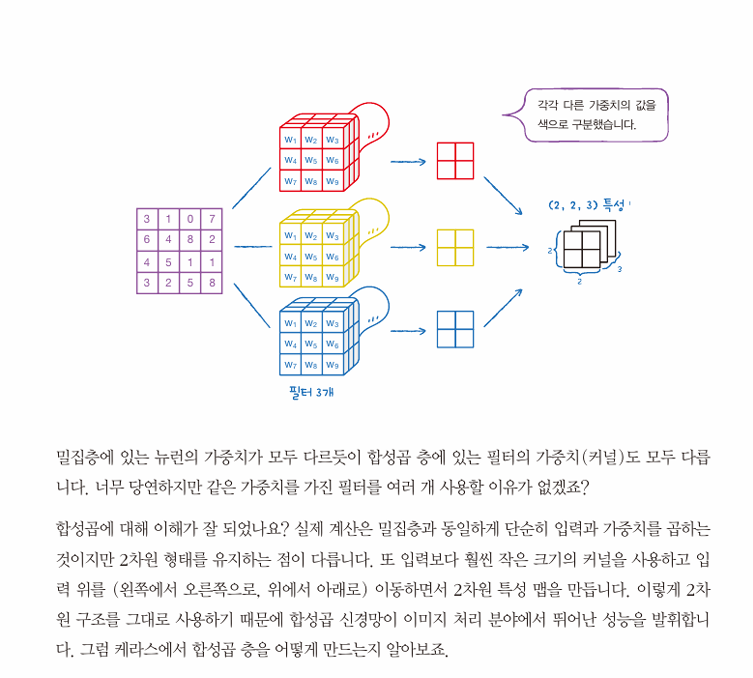

(2,2) 크기의 특성 맵을 층층이 쌓으면 3차원 배열이 됨
위의 그림에서는 3개의 필터를 사용했기 때문에 (2,2,3) 크기의 3차원 배열이 됨

## keras 합성곱 층

In [1]:
# Conv2D 클래스를 제공하여 입력위를 이동하는 합성곱 제공

from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')

<Conv2D name=conv2d, built=False>

이전에 dense 층 사용했던 것처럼 conv2d 층을 넣으면 됨

커널의 크기는 하이퍼 파라미터 => 여러가지 값을 시도 必

하지만 보통 (3,3)이나 (5,5)크기를 권장

< 합성곱 신경망의 정의 >

- 1개 이상의 합성곱 층을 쓴 인공신경망을 의미.
- 꼭 합성곱 층만 사용해야만 합성곱 신경망은 아님. 밀집층 둠




✅ 앞에서 예로 들었던 합성곱 계싼은 (4,4) 입력에 (3,3) 크기의 커널을 적용하여 (2,2) 크기의 특성 맵을 만듬

✅ 그런데 커널 크기는 (3,3)으로 그대로 두고 출력 크기를 입력과 동일하게 (4,4)로 만들려면 어떻게 해야할까?

▶ (4,4) 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱 하는 척을 해야함..


##**패딩** 이란?

- 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀
- 패딩을 사용하지 않는 것을 valid 패딩이라고 함
- 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것을 same 패딩이라고 함

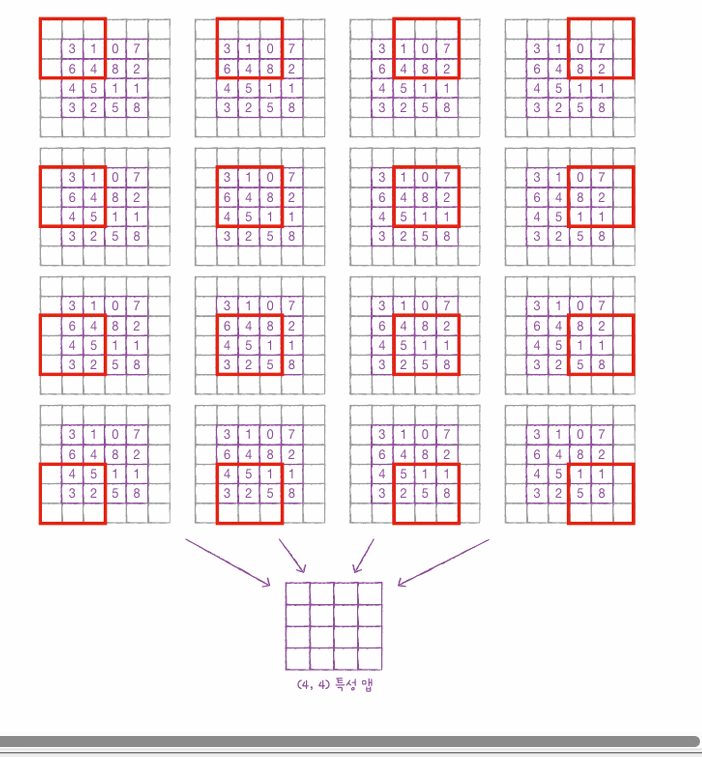

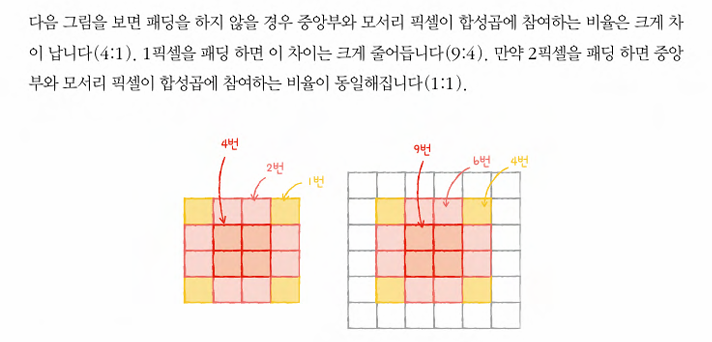

**스트라이드**란 ?

- 합성곱 층에서 필터가 입력 위를 이동하는 크기
- 일반적으로 stirde는 1픽셀 사용

In [2]:
# 스트라이드 (이동의 크기)
# 기본적으로 스트라이드 = 1 (즉, 한칸씩 이동한다는 뜻)

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

<Conv2D name=conv2d_1, built=False>

**풀링** 이란??

- 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할을 수행
- 합성곱처럼 입력 위를 지나가면서 도장을 찍음. 도장을 찍은 영역에서 가장 큰 값을 고르거나/평균값을 계산함.
- 대표적으로 max 풀링과 average풀링이 있음
- (2,2) 풀링으로 입력을 절반으로 줄임
- 마지막 차원인 '개수'는 그대로 유지하고, 너비와 높이만 줄이는 것

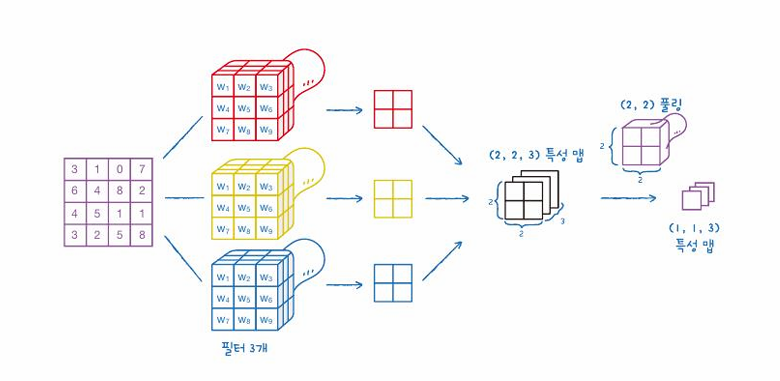

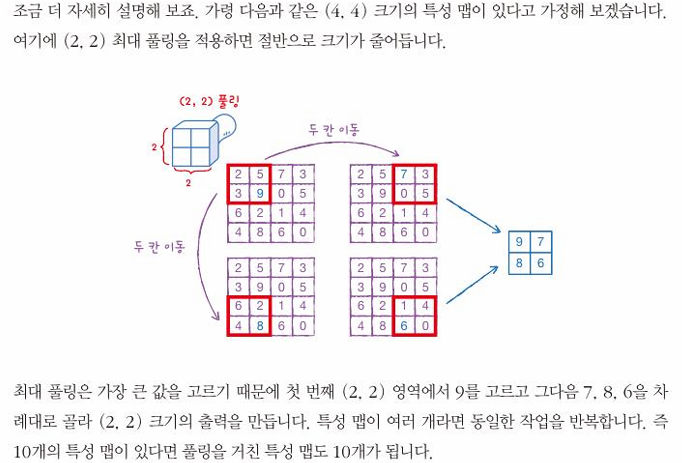

In [3]:
# 풀링

keras.layers.MaxPooling2D(2)

<MaxPooling2D name=max_pooling2d, built=True>

In [4]:
keras.layers.MaxPool2D(2, strides=2, padding='valid') # valid 패딩 = 패딩을 사용하지 않는 것

<MaxPooling2D name=max_pooling2d_1, built=True>

# 합성곱 신경망을 사용한 이미지 분류

p445~

*패션 mnist 데이터 불러오고 전처리*

데이터 스케일을 0-255 사이에서 0-1 사이로 바꾸고,
훈련 세트와 검증 세트로 나누기

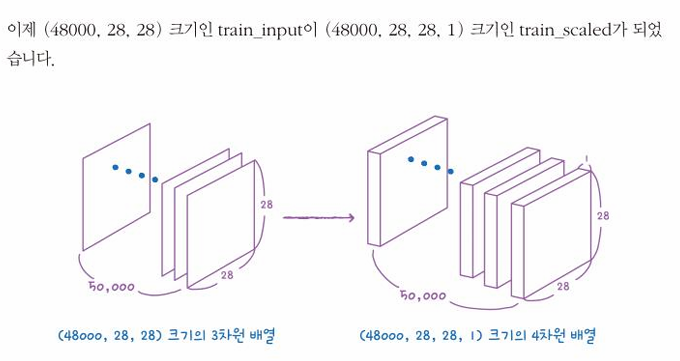

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 하지만(reshape나 flatten 클래스 사용)

**합성곱 신경망은 2차원 이미지를 그대로 사용하기 떄문에 이렇게 일렬로 펼치지 않는다**



## 합성곱 신경망 만들기

- 전형적인 합성곱 신경망의 구조: 합성곱 층으로 이미지에서 특징을 감지한 후, 밀집층으로 클래스에 따른 분류 확률을 계산
- keras의 sequential 클래스를 사용해 순서대로 구조 정의
  - sequential 클래스의 객체를 만들고 첫 번째 합성곱 층인 Conv2D를 추가

In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
# 32개의 필터, 커널의 크기는 (3,3), 렐루 활성화 함수와 셰임 패딩 사용
# 입력의 차원 지정해주기 : input_shape 매개변수를 (28,28) 이미지 -> (28,28,1)로 변경한 것으로 지정

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 풀링 층 추가

model.add(keras.layers.MaxPooling2D(2))

(2,2) 풀링을 적용했으므로 특성 맵의 크기가 절반으로 줄어들어
특성맵의 크기는 (14,14,32)가 됨


*- 필터 개수는 32개 이므로 특성 맵 깊이는 32이므로*

In [8]:
# 첫번째 합성곱-풀링 층 다음에 두 번째 합성곱-풀링 층 추가

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 필터 64개를 사용했으므로 최종적으로 만들어지는 특성 맵의 크기: (7,7,64)

**만들어진 특성 맵을 일렬로 펼치자**

- 마지막에 10개의 뉴런을 가진 출력층에서 확률을 계산하기 때문에 일렬로 펼침
- 특성 맵을 일렬로 펼쳐서 바로 출력층에 전달하지 않고, 중간에 하나의 밀집 은닉층을 하나 더 두도록 하자
- 즉, flatten 클래스 다음에 dense 은닉층, 마지막으로 dense 출력층의 순서대로 구성

In [9]:
# 만들어진 특성 맵을 일렬로 펼치자

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu')) # 100개의 뉴런, 활성화 함수는 relu 사용
model.add(keras.layers.Dropout(0.4)) # dropout을 통해 은닉층의 과대적합을 막음
model.add(keras.layers.Dense(10, activation='softmax')) # 10개의 클래스를 분류하는 다중 분류이므로 softmax 사용

In [10]:
# 모델 구조 출력

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

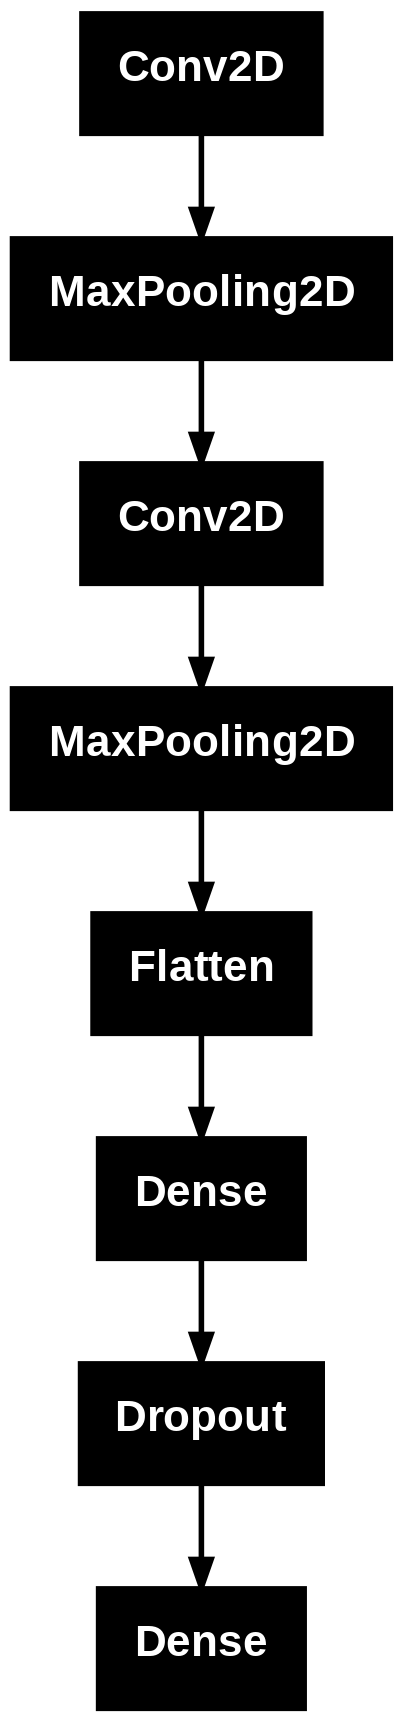

In [11]:
keras.utils.plot_model(model)

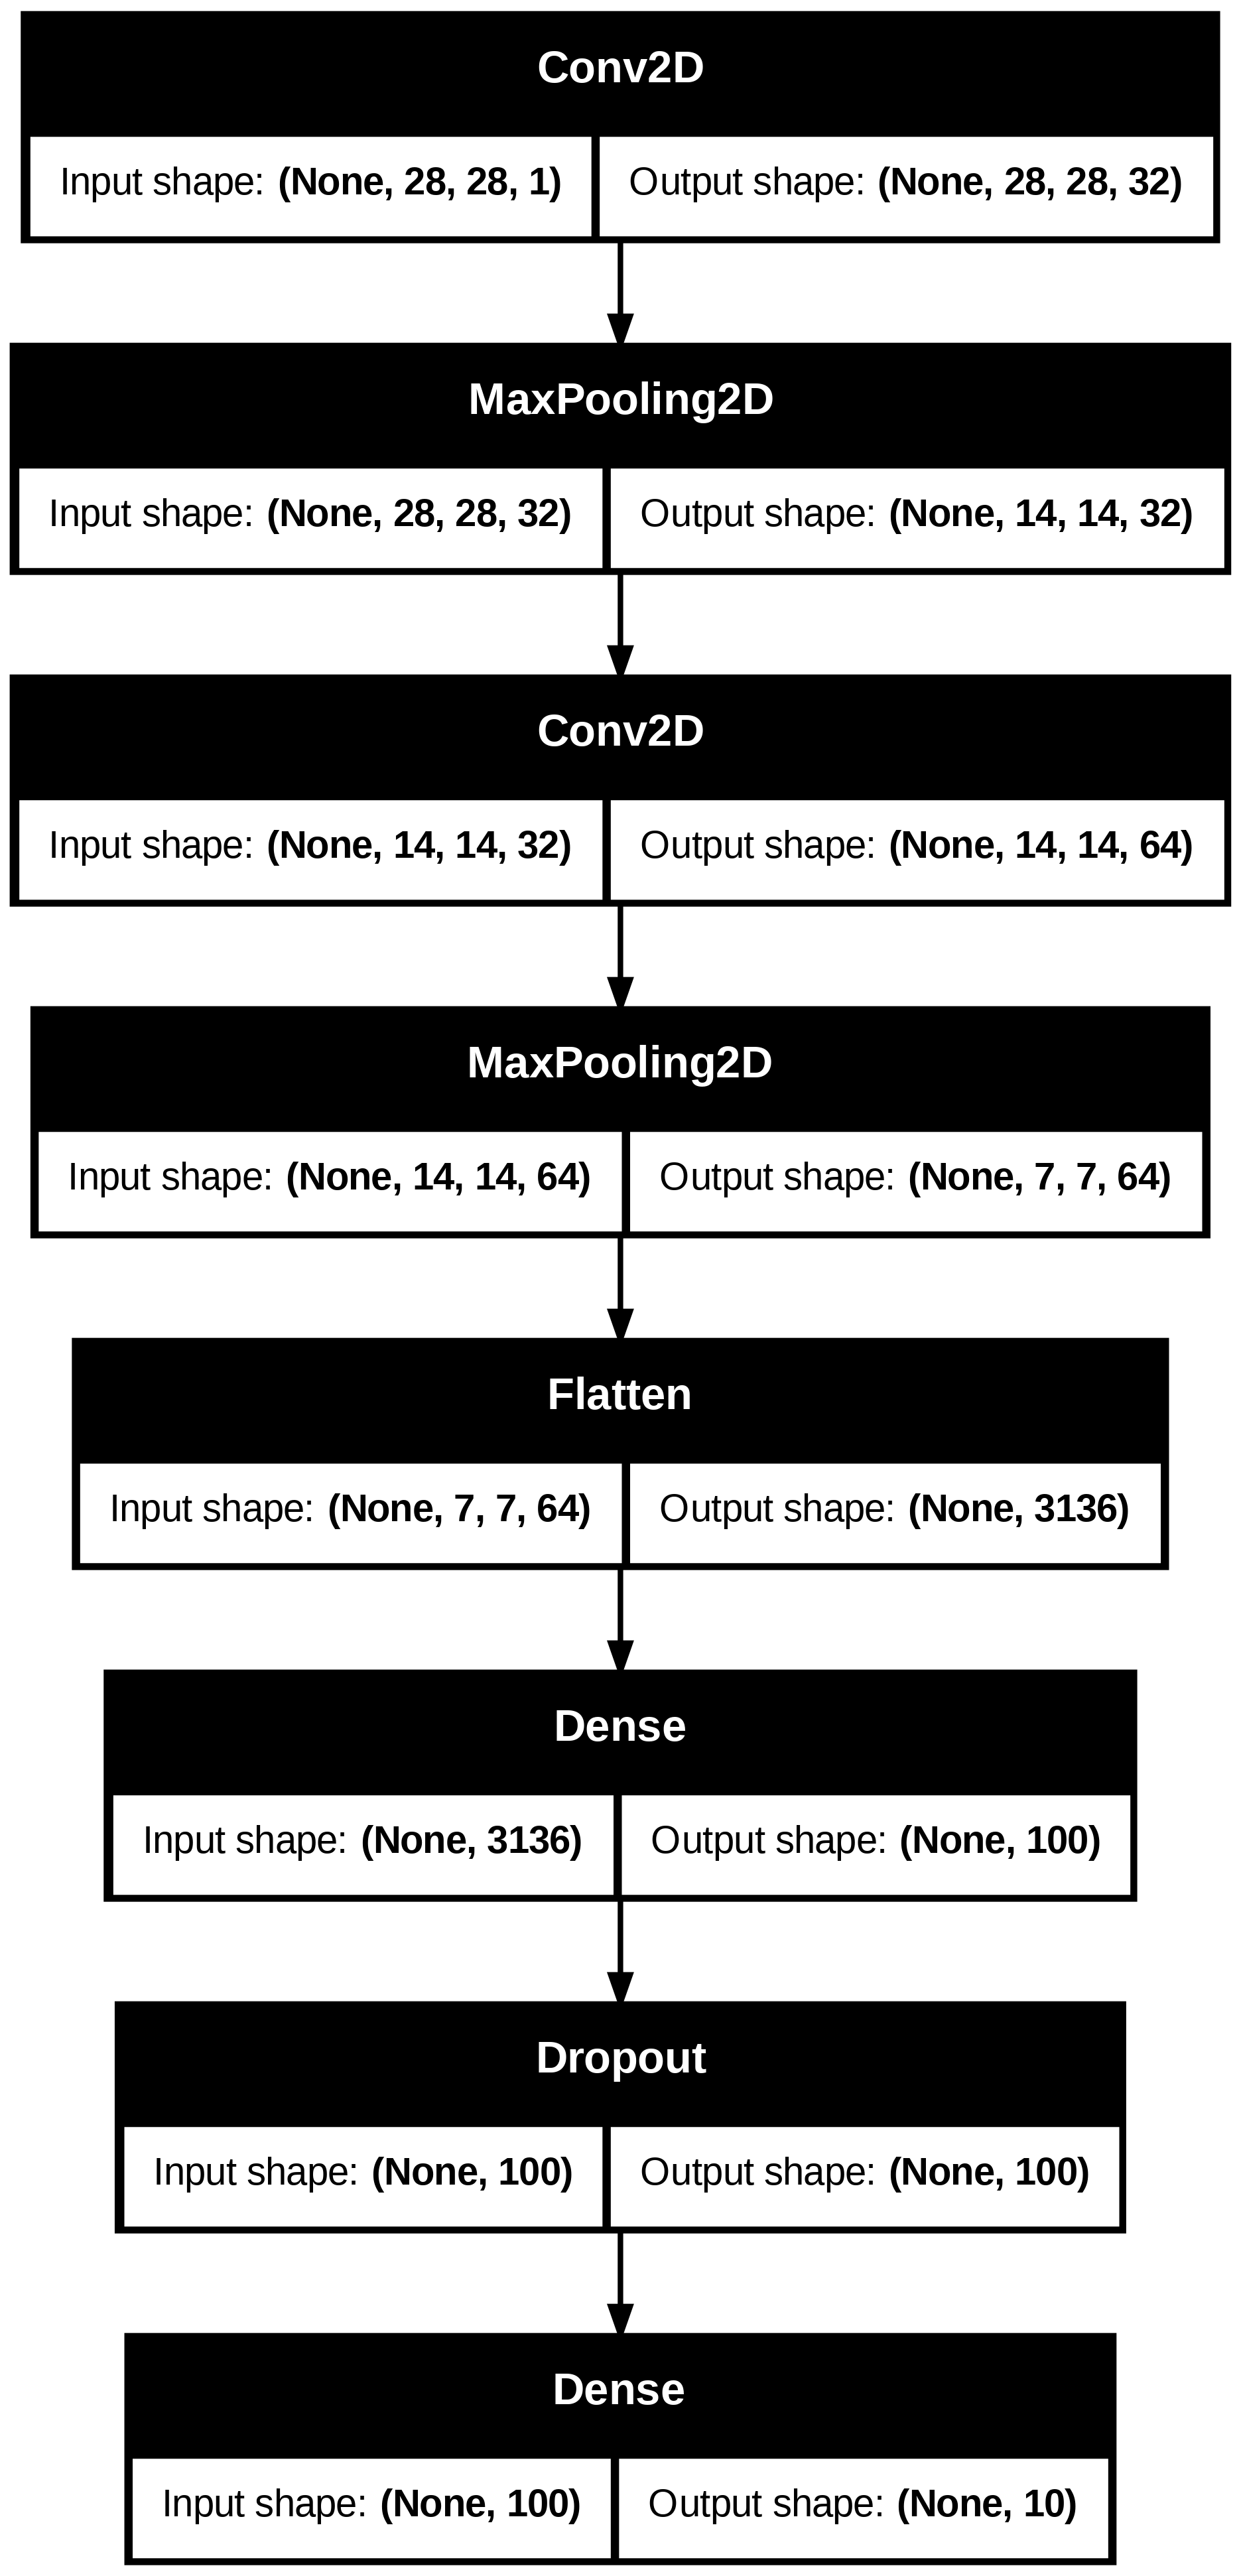

In [12]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

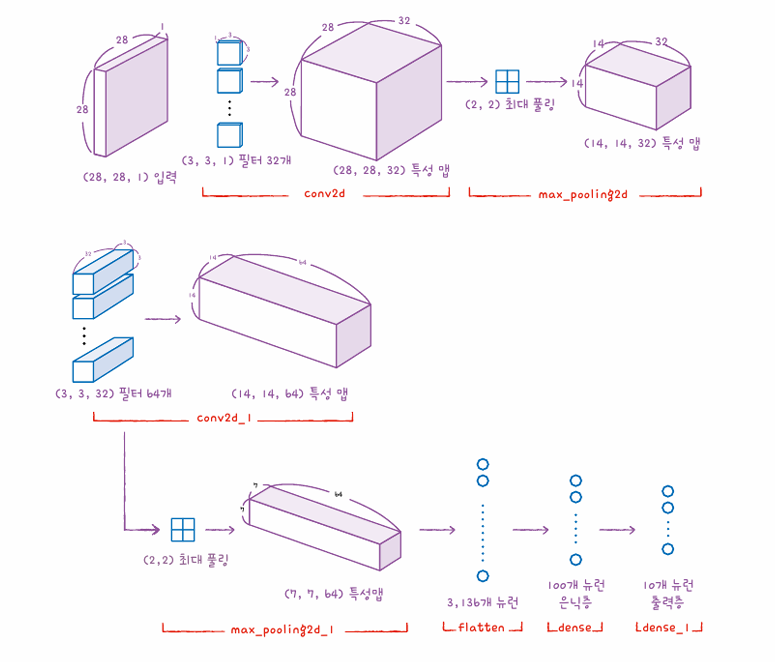

## 모델 컴파일과 훈련

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7440 - loss: 0.7255 - val_accuracy: 0.8764 - val_loss: 0.3393
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8672 - loss: 0.3725 - val_accuracy: 0.8947 - val_loss: 0.2886
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8862 - loss: 0.3057 - val_accuracy: 0.9072 - val_loss: 0.2523
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8995 - loss: 0.2744 - val_accuracy: 0.9100 - val_loss: 0.2342
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9092 - loss: 0.2467 - val_accuracy: 0.9074 - val_loss: 0.2454
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9194 - loss: 0.2232 - val_accuracy: 0.9159 - val_loss: 0.2355


In [14]:
import matplotlib.pyplot as plt

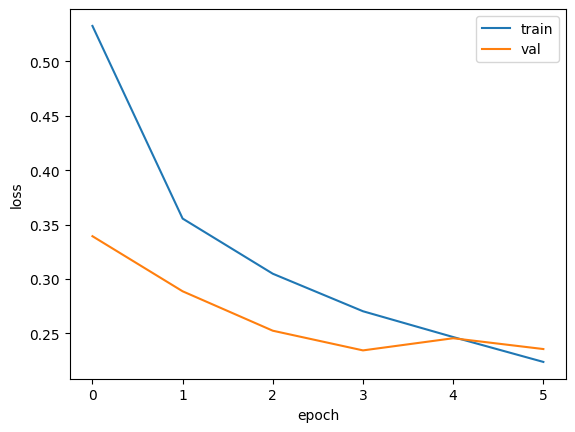

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9139 - loss: 0.2274


[0.23422881960868835, 0.9100000262260437]

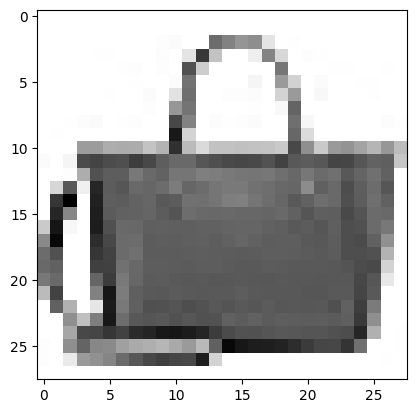

In [17]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [18]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
[[2.6756912e-14 6.2314751e-22 6.0280747e-17 1.6681495e-15 1.4151098e-13
  2.0151011e-13 1.7321322e-14 1.7195529e-12 1.0000000e+00 4.3255304e-15]]


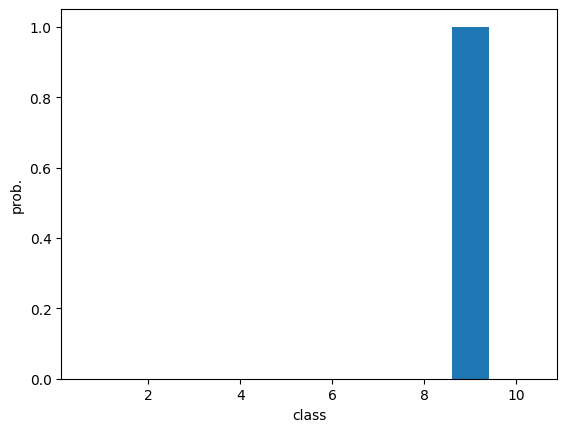

In [19]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [20]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [21]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [23]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9018 - loss: 0.2704


[0.26117271184921265, 0.9042999744415283]